In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Importing the dataset
avgtemp=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/AverageTemperature/avgtemp.csv")

In [3]:
avgtemp

,Year,Month,avgtemp_past,avgtemp_pasttopast,avgtemp
0,2002,1,16.85,18.46,17.89
1,2002,2,20.22,17.85,16.60
2,2002,3,18.30,19.64,18.02
3,2002,4,14.86,17.75,16.72
4,2002,5,15.28,13.03,14.20
...,...,...,...,...,...
211,2019,8,8.12,8.78,8.78
212,2019,9,10.91,8.60,8.60
213,2019,10,13.51,10.03,10.03
214,2019,11,14.70,14.19,14.19


In [4]:
avgtemp.shape

(216, 5)

In [5]:
avgtemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
Year                  216 non-null int64
Month                 216 non-null int64
avgtemp_past          216 non-null float64
avgtemp_pasttopast    216 non-null float64
avgtemp               216 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=avgtemp.corr()
corr_matrix

,Year,Month,avgtemp_past,avgtemp_pasttopast,avgtemp
Year,1.000000,0.000000,-0.012342,-0.032402,0.002503
Month,0.000000,1.000000,-0.437231,-0.435343,-0.444344
avgtemp_past,-0.012342,-0.437231,1.000000,0.921491,0.920216
avgtemp_pasttopast,-0.032402,-0.435343,0.921491,1.000000,0.933440
avgtemp,0.002503,-0.444344,0.920216,0.933440,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

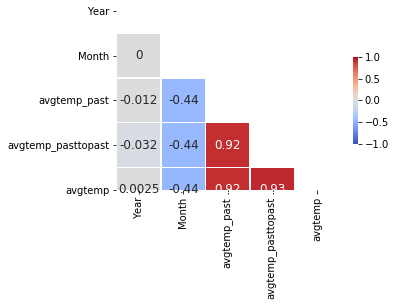

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
avgtemp=avgtemp.drop(['Year','Month'],axis=1)

In [10]:
avgtemp.shape

(216, 3)

In [11]:
X=avgtemp.drop('avgtemp',axis=1)
y=avgtemp.avgtemp

In [12]:
X

,avgtemp_past,avgtemp_pasttopast
0,16.85,18.46
1,20.22,17.85
2,18.30,19.64
3,14.86,17.75
4,15.28,13.03
...,...,...
211,8.12,8.78
212,10.91,8.60
213,13.51,10.03
214,14.70,14.19


In [13]:
y

0      17.89
1      16.60
2      18.02
3      16.72
4      14.20
       ...  
211     8.78
212     8.60
213    10.03
214    14.19
215    14.96
Name: avgtemp, Length: 216, dtype: float64

In [14]:
X.shape

(216, 2)

In [15]:
y.shape

(216,)

In [16]:
#Creating Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [17]:
X_train,y_train=np.array(X_train),np.array(y_train)

### Linear Regressor

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [19]:
li=LinearRegression()

In [20]:
li.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Prediction of values
Lir_ypred= li.predict(X_test)
Lir_ypred

array([16.47398943,  6.79206524, 10.50365241, 17.78873834, 17.81822148,
       12.37611495, 16.93412529,  7.81480162,  8.83353309,  9.65082215,
       11.00822127,  8.44399542, 11.83382044, 17.07348237,  9.72716317,
       17.59538832, 16.35221708, 16.11384847,  7.68847644, 15.57420765,
       14.53091374,  9.37479548])

In [22]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 1.7419698849604557
Root Mean Squared Error: 1.3198370675808646


In [23]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.8807783388535537

### Lasso Regressor

In [24]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
Lass_ypred= lass.predict(X_test)

In [26]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
#print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 1.7418991349531223
Root Mean Squared Error: 1.319810264755174


In [27]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.8807831810345084

### Ridge Regressor

In [28]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
rid_ypred= rid.predict(X_test)

In [30]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 1.741969836292018
Root Mean Squared Error: 1.3198370491435745


In [31]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.8807783421844564

### Decision Tree Regressor

In [32]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [34]:
dt_ypred= dt.predict(X_test)

In [35]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 3.6648772727272716
Root Mean Squared Error: 1.9143869182396938


In [36]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.7491731859863229

### KNeighbour Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=14)
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [38]:
kn1_pred=kn.predict(X_test)

In [39]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 1.6402280148423019
Root Mean Squared Error: 1.280713869231649


In [40]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.887741624997796

### SVR Regressor

In [41]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 2.7430867220467468
Root Mean Squared Error: 1.65622665177407


In [43]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.8122611886148668

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [46]:
rf_pred=rf.predict(X_test)

In [47]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 1.9635005773909164
Root Mean Squared Error: 1.4012496484891321


In [48]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8656166202874022

### Bayes Regressor

In [49]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [50]:
br_pred=br.predict(X_test)

In [51]:
print('Mean squared Error:',mean_squared_error(y_test,br_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,br_pred)))
print('R2_Score:',r2_score(y_test,br_pred))

Mean squared Error: 1.7388230254956307
Root Mean Squared Error: 1.318644389323987
R2_Score: 0.8809937121593898


In [52]:
bayes_r2_score=r2_score(y_test,br_pred)
bayes_r2_score

0.8809937121593898

In [53]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

No handles with labels found to put in legend.


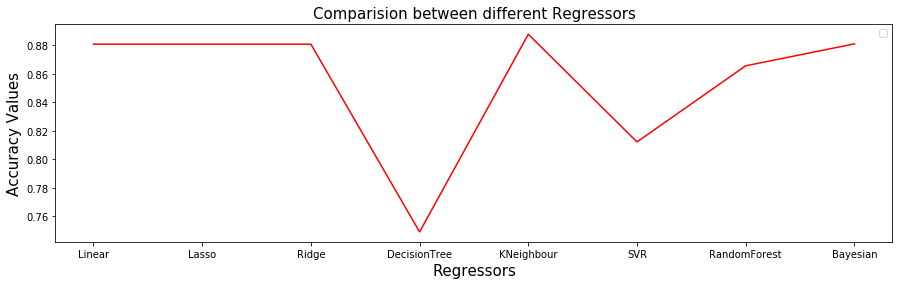

In [54]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


## KNeighbour Regressor is sutaible for Average Temperature with accuracy of 89.72% followed by Bayesian Regressor with accuracy of 88.03%

In [55]:
avgtemp2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/AverageTemperature/avgtemp2020.csv")

In [56]:
avgtemp2020=avgtemp2020.drop(['Year','Month'],axis=1)

In [57]:
avgetemp2020=avgtemp2020.iloc[:,:].values

In [58]:
avgtemp2020

,avgtemp_past,avgtemp_pasttopast
0,17.27,16.97
1,18.52,16.52
2,18.47,16.26
3,19.05,16.79
4,15.40,15.34
5,9.39,8.35
6,8.10,7.48
7,8.78,8.12
8,8.60,10.91
9,10.03,13.51


In [59]:
avgtemp2020_pred=[]

In [60]:
#Using Kneighbour regressor for prediction
avgtemp2020_pred=kn.predict(avgtemp2020)

In [61]:
avgtemp2020_pred

array([17.59071429, 17.07      , 17.12      , 17.35785714, 15.75785714,
        8.80071429,  7.90285714,  8.60214286,  9.89714286, 11.55785714,
       15.06      , 15.58428571])

In [62]:
#Predicting for 2020
avgtemp_data=pd.DataFrame(data=avgtemp2020_pred)
avgtemp_data

,0
0,17.590714
1,17.070000
2,17.120000
3,17.357857
4,15.757857
5,8.800714
6,7.902857
7,8.602143
8,9.897143
9,11.557857


In [63]:
#Exporting the predictions of 2020 into csv file
avgtemp_data.to_csv(r"C:\Users\Abhishek Wagh\Desktop\MTech_Project\Sugarcane\Phase1\csv\AverageTemperature\2020avgtemp.csv")
